In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("health_check.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [4]:
df.replace({"M":0, "F":1} , inplace = True)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
classes = list(df['class'].unique())
mapping_dict = { ch : i for i, ch in enumerate(sorted(classes, reverse=True)) }
print (mapping_dict)
df['class'].replace(mapping_dict , inplace = True)
df.head()

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


<Axes: >

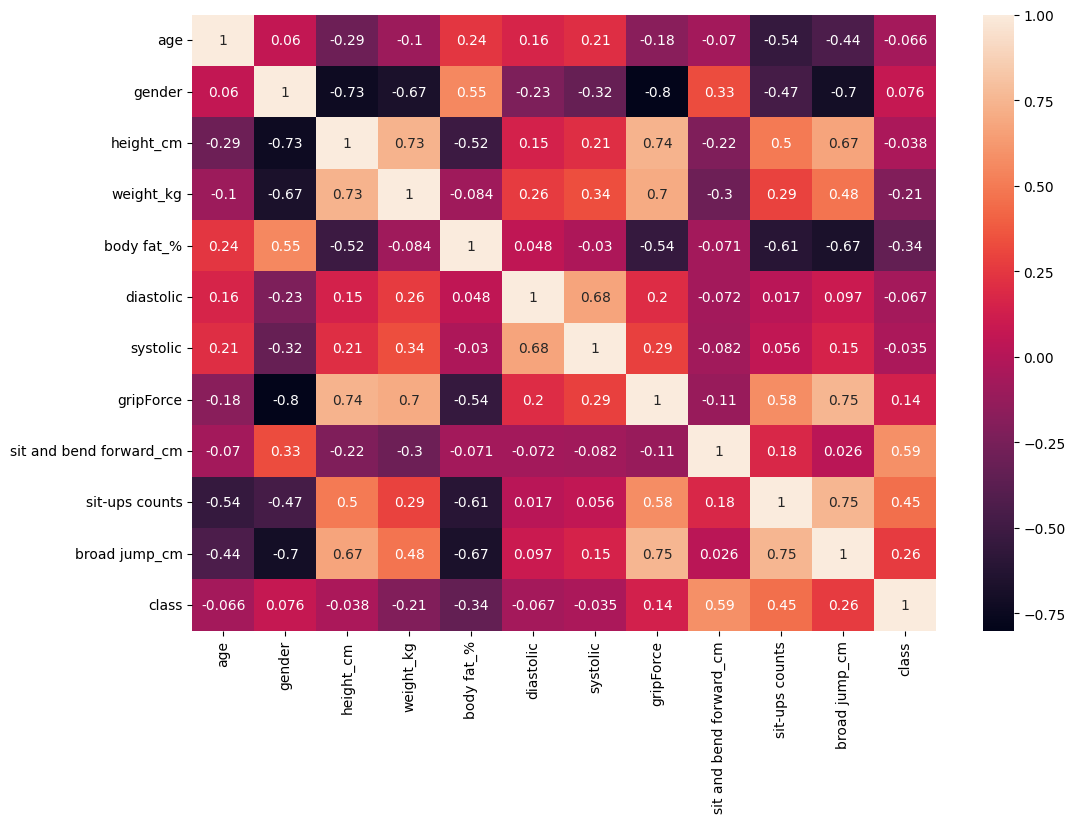

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
df.boxplot(rot = 0, vert=False)

In [7]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(13393, 11) (13393,)


In [8]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Valid : ', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (10847, 11) (10847,)
Valid :  (1206, 11) (1206,)
Test  :  (1340, 11) (1340,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train,y_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: >

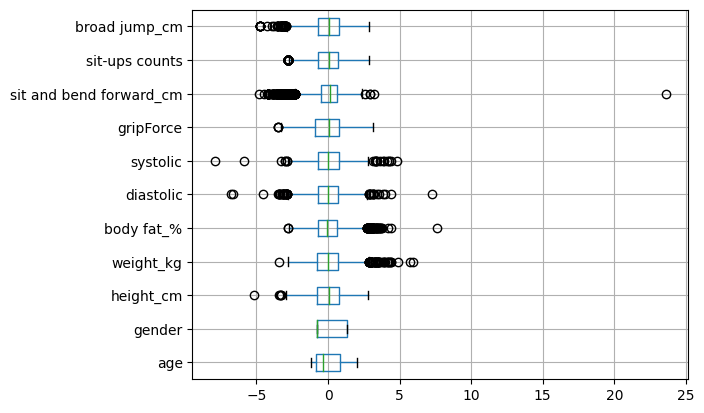

In [10]:
pd.DataFrame(X_train,columns=df.columns[:-1]).boxplot(rot = 0, vert=False)

In [23]:
import tensorflow
tensorflow.__version__

'2.13.0'

- Link - www.tensorflow.org 
- All the modules that are within the library are listed in the API section
- On further scrolling, Classes, functions and data types supported by tensorflow are given
- In the left all these modules are listed in alphabetical order.

There are two modules with which we can start right away

### tf.keras Module

**What is Keras?**
- It is a library providing high-level neural networks APIs developed with the specific goal of making it easy to build and use giant deep learning models.
- Keras merely provides high-level APIs for deep learning, the underlying code responsible for actual execution of algorithms (mostly written in C/C++) is provided by a backend.
- it is Open Source code – Large community support

- Link - https://keras.io

In [24]:
dir(tensorflow.keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'dtensor',
 'estimator',
 'experimental',
 'export',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'saving',
 'utils']

Let's look at the various activation functions available inside keras

In [25]:
dir(tensorflow.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

Let's look what tf.keras.layers proviide

In [26]:
dir(tensorflow.keras.layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'EinsumDense',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPo

We can write code in keras using two ways:

1. Sequential API
2. Functional API

### Sequential API
It is an API used to create models layer-by-layer by stacking them. It creates a one input with one output model.

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- Sequential - It is a class that is used to model a linear stack of layers
- Dense - A Dense layer helps in defining one layer of a Feedforward NN. In a dense layer, each neuron in the layer is connected to all the neurons from the previous layer thus called dense.

In [52]:
model = Sequential([
                    Dense(64, activation='relu'),     #hidden dense layer with 64 neurons
                    Dense(4, activation='softmax')    #output layer with 4 neurons
])

activation parameter is optional, by default it is linear

**How to initialize the parameters (pass input and weights) of the neural network?**<br>
Using input_shape parameter

In [53]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(11,)),
                    Dense(4, activation='softmax') 
])

- Inputs (total features) = 11
- Neurons in the first dense layer = 64
- Total Weights for the first layer = 11 x 64
- Total Bias = 64
- Input for the second dense layer (output layer) = 64
- Neurons in output layer = 4
- Total Weights for the ouput layer = 64 x 4
- Total Bias = 64

In [54]:
# print(model.weights)
print(type(model.weights))

<class 'list'>


In [55]:
for params in model.weights:
    print(params.shape)

(11, 64)
(64,)
(64, 4)
(4,)


#### Another way of defining the same model
- Use model.add()

In [56]:
model = Sequential()

In [57]:
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dense(4, activation='softmax'))

**Generating the summary of the model**
- This can also helps in checking the parameters of the model

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                768       
                                                                 
 dense_17 (Dense)            (None, 4)                 260       
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


What does None represents?
- Batch size
- Keras does not know the batch size hence in summary it returns none

#### Giving custom names to the layers

In [59]:
model = Sequential([
                    Dense(64, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(4, activation="softmax", name="output")
])

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                768       
                                                                 
 output (Dense)              (None, 4)                 260       
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Weight and Bias Initializers

- Weight initialization is crucial in deep learning as it affects how gradients propagate through the network.
- Proper initialization helps in avoiding issues like vanishing/exploding gradients and speeds up convergence.

**Weight Initialization Techniques:**
Keras provides several weight initializers, each suited for different types of models and layers. Some of them are:
1. Glorot Initializers - This method ensures that the variance of activations remains the same across layers (sigmoid, tanh, softmax)
2. He Initializers - This method is designed specifically for ReLU and its variants (Leaky ReLU, PReLU, etc.)

Glorot methods are used for general purpose but He initializers are used in deep networks

- **Glorot Normal**<br>
$w^k_{ij} \sim N(0,\sigma_{ij})$, where $\sigma_{ij} = \frac{2}{fanin+fanout}$


- **Glorot Uniform**<br>
$w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin+fanout}}, \frac{\sqrt{6}}{\sqrt{fanin+fanout}}\bigg]$


- **He Normal**<br>
$N(0,\sigma)$, where $\sigma = \frac{2}{fanin}$


- **He uniform**<br>
$Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin}}, \frac{\sqrt{6}}{\sqrt{fanin}}\bigg]$

Here,
- Number of input neurons (fan_in) = 11
- Number of output neurons (fan_out) = 64


### Glorot Normal
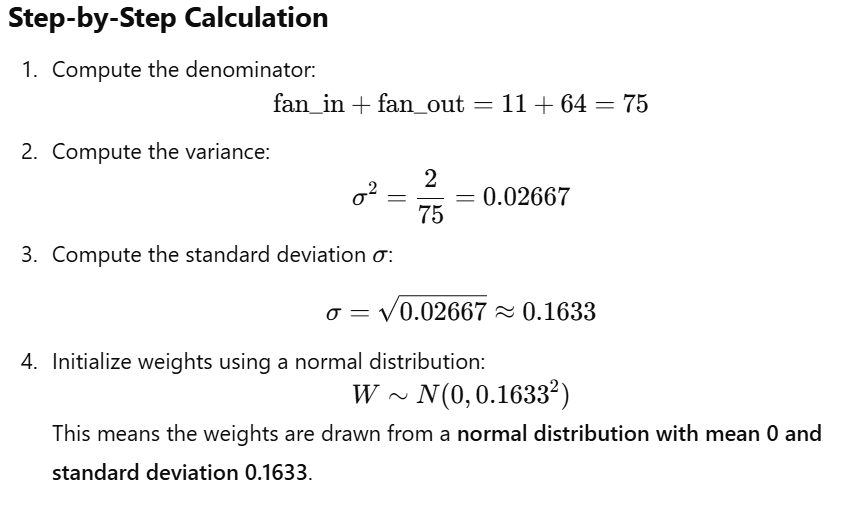

### Glorot Uniform
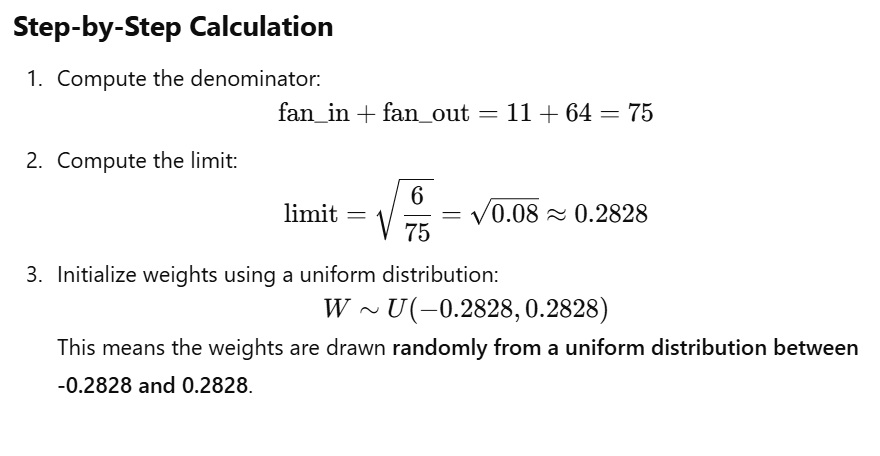

Glorot Uniform has been the most widely used one in most of the Deep Learning frameworks today

In [64]:
model = Sequential([
                    Dense(64, activation="relu", input_shape=(11,), name="hidden_1", kernel_initializer='he_normal', bias_initializer='zeros'),
                    Dense(4, activation="softmax", name="output", kernel_initializer='glorot_normal', bias_initializer='ones')
])

**What if we want to initialise our own weights and biases?**

In [65]:
Dense(64, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
          bias_initializer=tf.keras.initializers.Constant(value=0.4),
          activation='relu')

### Model Compiling and Optimization
Specifying -
1. Loss Function
2. Optimizer

In [66]:
model = Sequential([
                    Dense(16, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(8, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")
])

In [68]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics=["accuracy"]
)

- There are multiple options for optimisers, loss and metrics

- We can also directly instantiate these custom objects with the classes defined in keras submodules for example opt = keras.optimizers.Adam(learning_rate=0.01)

In [69]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
)

All these strings which we have passed as argument i.e. adam, categorical_crossentropy and accuracy are reference to some default objects defined in keras. They are called string identifiers.

Other available string identifiers to pass in loss parameter:
1. Use categorical_crossentropy if target vector is one hot-encoded - [1,0,0,0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]
2. Use sparse_categorical_crossentropy if target vector is ordinal integer values - 0, 1, 2, 3

 check if the loss and optimisers for the model are set

In [70]:
model.loss

In [71]:
model.optimizer

### Training the model

In [73]:
def seed_everything(seed = 42):
    np.random.seed(seed)
    tensorflow.random.set_seed(seed)


seed_everything()

- Seed in ML means intilization state of a pseudo random number generator.
- After setting the same seed whenever random() function is called we will get a specific way of generating numbers.
- If we use the same seed we will get exactly the same pattern of numbers during weights initializations

In [74]:
model.fit(X_train, y_train, 
          epochs=10, 
          batch_size=256, 
          validation_split=0.1, 
          verbose=1)

Epoch 1/10
39/39 [==============================] - 1s 12ms/step - loss: 0.6711 - val_loss: 0.6796
Epoch 2/10
39/39 [==============================] - 0s 6ms/step - loss: 0.6686 - val_loss: 0.6735
Epoch 3/10
39/39 [==============================] - 0s 5ms/step - loss: 0.6580 - val_loss: 0.6788
Epoch 4/10
39/39 [==============================] - 0s 5ms/step - loss: 0.6549 - val_loss: 0.6666
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.6526 - val_loss: 0.6632
Epoch 6/10
39/39 [==============================] - 0s 5ms/step - loss: 0.6465 - val_loss: 0.6678
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.6420 - val_loss: 0.6640
Epoch 8/10
39/39 [==============================] - 0s 6ms/step - loss: 0.6440 - val_loss: 0.6515
Epoch 9/10
39/39 [==============================] - 0s 6ms/step - loss: 0.6385 - val_loss: 0.6443
Epoch 10/10
39/39 [==============================] - 0s 7ms/step - loss: 0.6374 - val_loss: 0.6339


validation_split = 0.1 means 10% of the training data will be used for validation

**Observation**
- Our model is trained fr 10 epochs.
- model.fit is printing all the metrics like accuracy, loss, validation loss, validation accuracy etc.

Let us train the model for 500 epochs and store it

In [89]:
def create_model():
    model = Sequential([
                    Dense(32, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(16, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")])
    model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
    return model

model = create_model()

In [90]:
Model = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_split=0.1, 
          verbose=1)

Epoch 1/500
39/39 [==============================] - 1s 8ms/step - loss: 1.4057 - accuracy: 0.2726 - val_loss: 1.3321 - val_accuracy: 0.3465
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 1.2570 - accuracy: 0.4088 - val_loss: 1.2037 - val_accuracy: 0.4452
Epoch 3/500
39/39 [==============================] - 0s 4ms/step - loss: 1.1206 - accuracy: 0.4863 - val_loss: 1.0762 - val_accuracy: 0.4977
Epoch 4/500
39/39 [==============================] - 0s 4ms/step - loss: 1.0120 - accuracy: 0.5387 - val_loss: 0.9932 - val_accuracy: 0.5300
Epoch 5/500
39/39 [==============================] - 0s 4ms/step - loss: 0.9483 - accuracy: 0.5722 - val_loss: 0.9451 - val_accuracy: 0.5530
Epoch 6/500
39/39 [==============================] - 0s 4ms/step - loss: 0.9111 - accuracy: 0.5896 - val_loss: 0.9146 - val_accuracy: 0.5668
Epoch 7/500
39/39 [==============================] - 0s 4ms/step - loss: 0.8872 - accuracy: 0.6011 - val_loss: 0.8973 - val_accuracy: 0.5862
Epoch 8/500
3

Epoch 59/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.7310 - val_loss: 0.6697 - val_accuracy: 0.7300
Epoch 60/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.7339 - val_loss: 0.6702 - val_accuracy: 0.7244
Epoch 61/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.7339 - val_loss: 0.6681 - val_accuracy: 0.7253
Epoch 62/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.7339 - val_loss: 0.6716 - val_accuracy: 0.7290
Epoch 63/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.7333 - val_loss: 0.6652 - val_accuracy: 0.7336
Epoch 64/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.7355 - val_loss: 0.6630 - val_accuracy: 0.7272
Epoch 65/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.7359 - val_loss: 0.6614 - val_accuracy: 0.7318
Epoch 

39/39 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.7570 - val_loss: 0.6279 - val_accuracy: 0.7512
Epoch 117/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7512 - val_loss: 0.6264 - val_accuracy: 0.7493
Epoch 118/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.7589 - val_loss: 0.6265 - val_accuracy: 0.7502
Epoch 119/500
39/39 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7566 - val_loss: 0.6281 - val_accuracy: 0.7475
Epoch 120/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.7566 - val_loss: 0.6290 - val_accuracy: 0.7484
Epoch 121/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.7592 - val_loss: 0.6249 - val_accuracy: 0.7502
Epoch 122/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7553 - val_loss: 0.6274 - val_accuracy: 0.7530
Epoch 123/500

39/39 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7652 - val_loss: 0.6198 - val_accuracy: 0.7539
Epoch 174/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7634 - val_loss: 0.6189 - val_accuracy: 0.7567
Epoch 175/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7646 - val_loss: 0.6199 - val_accuracy: 0.7585
Epoch 176/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5793 - accuracy: 0.7613 - val_loss: 0.6156 - val_accuracy: 0.7622
Epoch 177/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7631 - val_loss: 0.6188 - val_accuracy: 0.7585
Epoch 178/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7645 - val_loss: 0.6189 - val_accuracy: 0.7631
Epoch 179/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7640 - val_loss: 0.6201 - val_accuracy: 0.7548
Epoch 180/500

39/39 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.7676 - val_loss: 0.6177 - val_accuracy: 0.7567
Epoch 231/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.7676 - val_loss: 0.6200 - val_accuracy: 0.7521
Epoch 232/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.7654 - val_loss: 0.6167 - val_accuracy: 0.7576
Epoch 233/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.7673 - val_loss: 0.6192 - val_accuracy: 0.7539
Epoch 234/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7667 - val_loss: 0.6173 - val_accuracy: 0.7539
Epoch 235/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5680 - accuracy: 0.7669 - val_loss: 0.6176 - val_accuracy: 0.7539
Epoch 236/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7664 - val_loss: 0.6173 - val_accuracy: 0.7539
Epoch 237/500

39/39 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.7688 - val_loss: 0.6176 - val_accuracy: 0.7539
Epoch 288/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.7694 - val_loss: 0.6219 - val_accuracy: 0.7558
Epoch 289/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.7708 - val_loss: 0.6199 - val_accuracy: 0.7530
Epoch 290/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5610 - accuracy: 0.7700 - val_loss: 0.6236 - val_accuracy: 0.7512
Epoch 291/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.7678 - val_loss: 0.6196 - val_accuracy: 0.7512
Epoch 292/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.7716 - val_loss: 0.6198 - val_accuracy: 0.7502
Epoch 293/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.7705 - val_loss: 0.6169 - val_accuracy: 0.7548
Epoch 294/500

39/39 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.7721 - val_loss: 0.6165 - val_accuracy: 0.7558
Epoch 345/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7745 - val_loss: 0.6130 - val_accuracy: 0.7594
Epoch 346/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7738 - val_loss: 0.6174 - val_accuracy: 0.7594
Epoch 347/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.7736 - val_loss: 0.6192 - val_accuracy: 0.7548
Epoch 348/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7736 - val_loss: 0.6161 - val_accuracy: 0.7521
Epoch 349/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7730 - val_loss: 0.6159 - val_accuracy: 0.7539
Epoch 350/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7719 - val_loss: 0.6130 - val_accuracy: 0.7604
Epoch 351/500

39/39 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7737 - val_loss: 0.6149 - val_accuracy: 0.7567
Epoch 402/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.7754 - val_loss: 0.6137 - val_accuracy: 0.7594
Epoch 403/500
39/39 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7733 - val_loss: 0.6119 - val_accuracy: 0.7567
Epoch 404/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.7734 - val_loss: 0.6176 - val_accuracy: 0.7594
Epoch 405/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7737 - val_loss: 0.6147 - val_accuracy: 0.7594
Epoch 406/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7733 - val_loss: 0.6173 - val_accuracy: 0.7539
Epoch 407/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.7753 - val_loss: 0.6125 - val_accuracy: 0.7567
Epoch 408/500

39/39 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.7775 - val_loss: 0.6118 - val_accuracy: 0.7594
Epoch 459/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7762 - val_loss: 0.6109 - val_accuracy: 0.7548
Epoch 460/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7768 - val_loss: 0.6198 - val_accuracy: 0.7576
Epoch 461/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7762 - val_loss: 0.6103 - val_accuracy: 0.7576
Epoch 462/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7772 - val_loss: 0.6193 - val_accuracy: 0.7567
Epoch 463/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7786 - val_loss: 0.6149 - val_accuracy: 0.7576
Epoch 464/500
39/39 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.7774 - val_loss: 0.6148 - val_accuracy: 0.7558
Epoch 465/500

In [91]:
Model

**To display the training matrices**

In [92]:
Model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [93]:
epochs = Model.epoch
loss = Model.history['loss']
accuracy = Model.history["accuracy"]
val_loss = Model.history["val_loss"]
val_accuracy = Model.history["val_accuracy"]

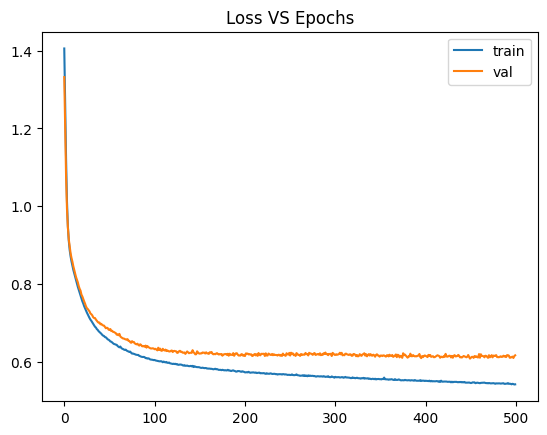

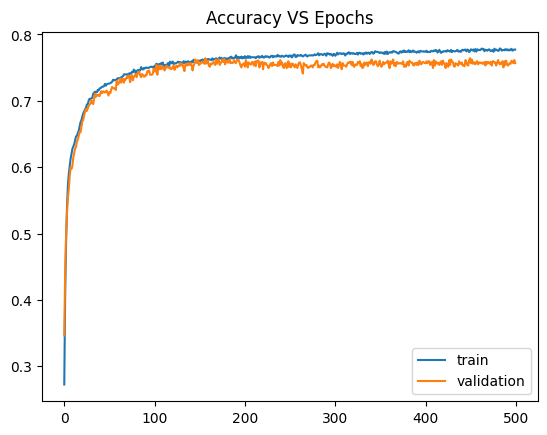

In [94]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()

- Both training and validation loss decrease with epochs.
- After around 120 epochs, training loss still keeps on decreasing, but validation loss starts to increase.
- This means that the model starts overfitting the training dataset after 120 epochs.
- Params learnt after 120 epochs would be the one which are overfitting the training dataset.